## Clustering della clientela di un centro commerciale

In questa esercitazione dovrai eseguire la segmentazione della clientela di un centro commerciale utilizzando il dataset che puoi trovare [qui](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers.csv).

Le informazioni di cui disponi sono:

- **CustomerID**: codice identificativo del cliente.

- **Gender**: sesso del cliente.

- **Age**: età del cliente.

- **Annual Income (k$)**: reddito annuo del cliente in 1000 dollari.

- **Spending Score (1-100)**: punteggio assegnato al cliente in base alla spesa.


Per segmentare la clientela devi creare un modello di clustering utilizzando l'algoritmo kmeans, fanne più di uno, utilizzando le seguenti informazioni:

1 Age e Spending Score

2 Annual Income e Spending Score

3 Age, Annual Income e Spending Score


Per ogni modello utilizza l'Elbow Method per determinare il numero di cluster e visualizza i cluster tramite uno scatterplot.<br/> Utilizza l'ultimo modello per associare [questi](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers_predict.csv)  ad un cluster, esporta il risultato in un file EXCEL chiamato *mall_customers_prediction.xlsx* contentente due colonne:

- **CustomerID**: il codice identificativo del cliente

- **Customer Group**: il cluster di appartenenza

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set dimensione grafici e tema seaborn
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

In [3]:
SEED = 1

In [4]:
URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
df = pd.read_csv(URL+"mall_customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
# Funzione per visualizzare la curva per diversi K (Elbow Method)
def plot_ssd_curve(X, k_range=(1, 10)):
  
    ssd = {}
  
    for k in range(k_range[0], k_range[1]):
        
        kmeans = KMeans(n_clusters=k, init="k-means++", random_state=SEED)
        kmeans.fit(X)
        ssd[k] = kmeans.inertia_
        
    plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
    plt.xlabel("Numero di cluster", fontsize=15)
    plt.ylabel("Somma delle distanza al quadrato", fontsize=15)
   
    plt.show()

In [6]:
# Funzione per la visualizzazione dei clusters 2d
def plot_clusters(model, data, axlabels=None, print_ssd=False):
    
    centers = model.cluster_centers_
    y_pred = model.predict(data)
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=.5, s=200)

    if axlabels!=None:
        plt.xlabel(axlabels[0], fontsize=15)
        plt.ylabel(axlabels[1], fontsize=15)

    if print_ssd:
        plt.text(X[:,0].max()-8, 0, f"SSD={model.inertia_:.2f}")

    plt.show()

### 1 Age e Spending Score

In [7]:
X = df[["Age", "Spending Score (1-100)"]].values

C:\Users\Gcarl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


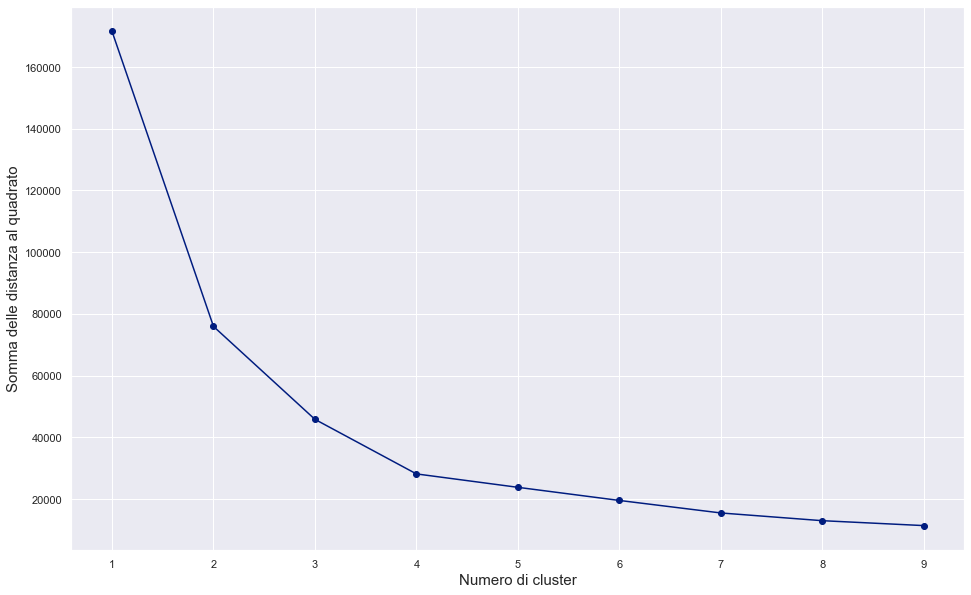

In [8]:
plot_ssd_curve(X)

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = SEED)
kmeans.fit(X)
kmeans.inertia_

28165.583566629342

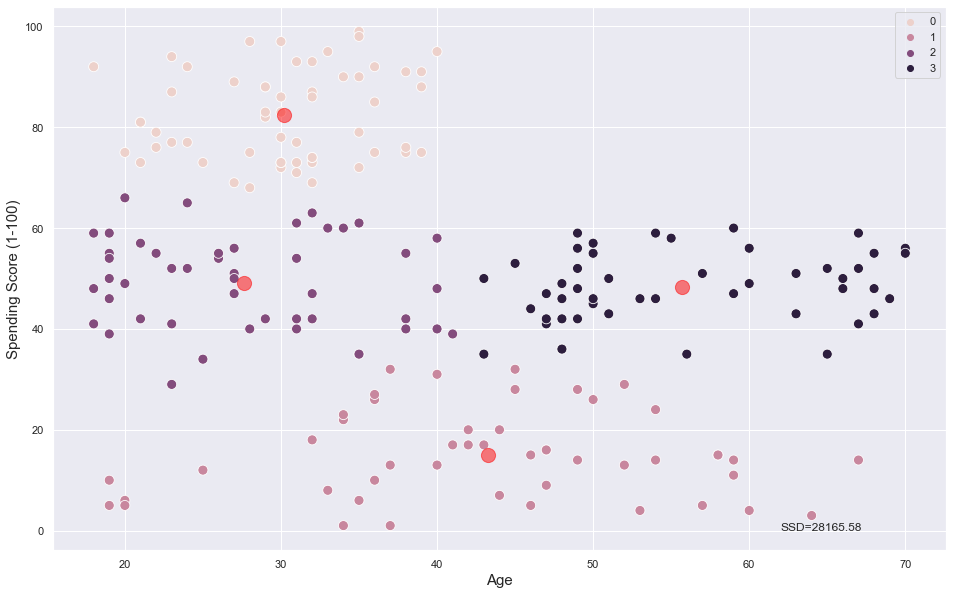

In [10]:
plot_clusters(kmeans, X, axlabels=["Age", "Spending Score (1-100)"], print_ssd=True)

### 2 Annual Income e Spending Score

In [11]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

C:\Users\Gcarl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


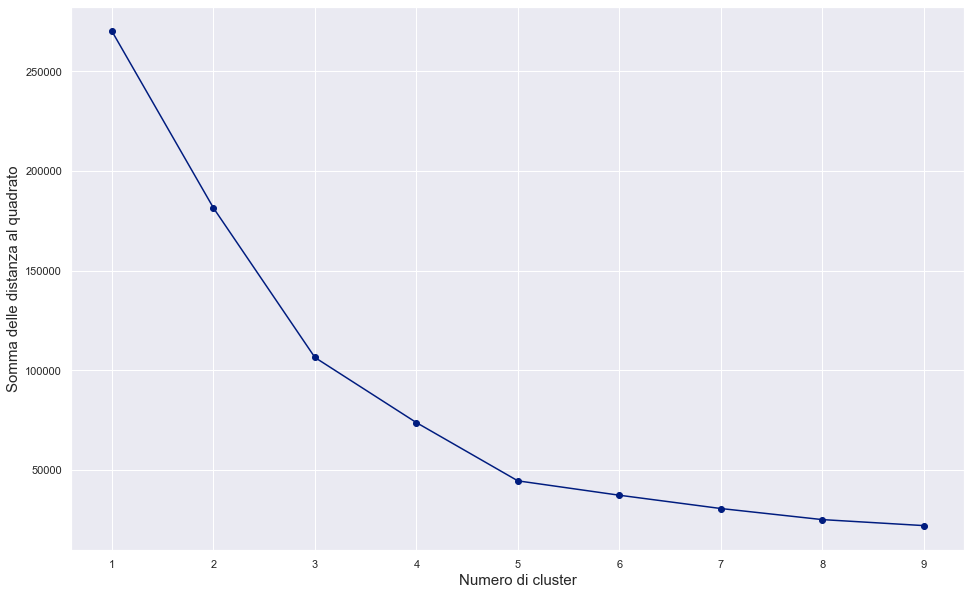

In [12]:
plot_ssd_curve(X)

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = SEED)
kmeans.fit(X)
kmeans.inertia_

44448.45544793369

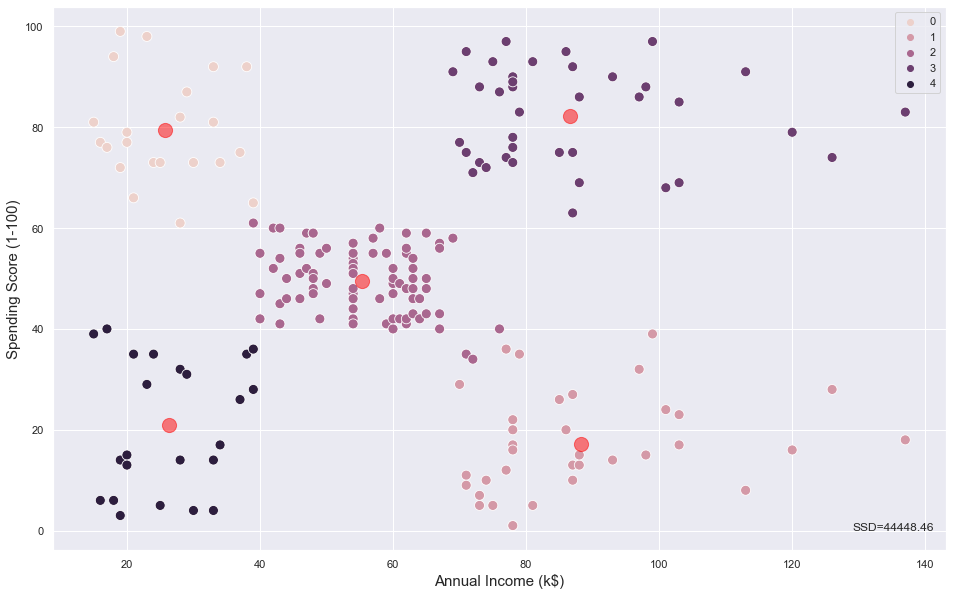

In [14]:
plot_clusters(kmeans, X, axlabels=["Annual Income (k$)", "Spending Score (1-100)"], print_ssd=True)

### 3 Age, Annual Income e Spending Score

In [15]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

C:\Users\Gcarl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


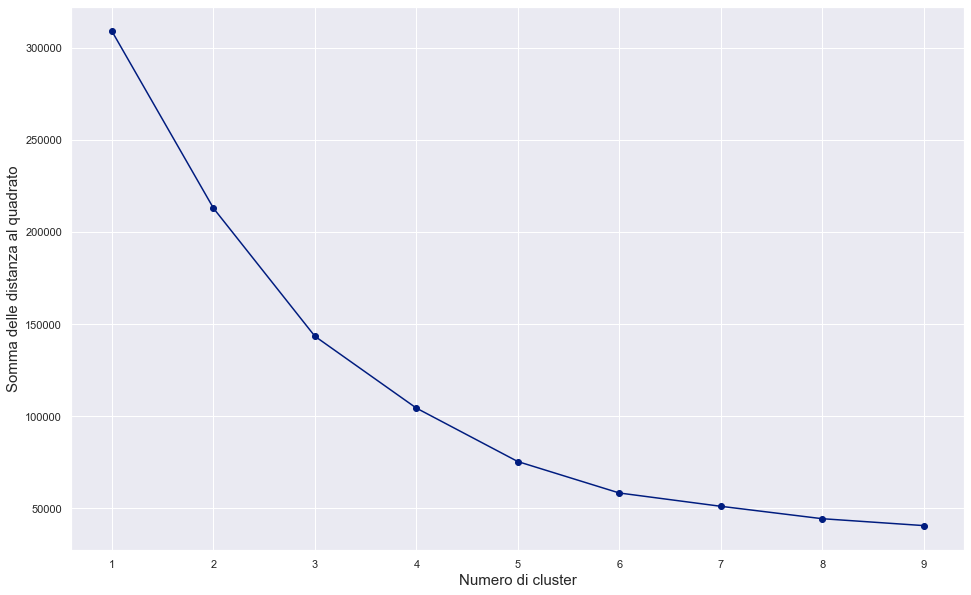

In [16]:
plot_ssd_curve(X)

In [17]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = SEED)
kmeans.fit(X)
kmeans.inertia_

58300.443321590676

In [18]:
from mpl_toolkits import mplot3d

In [19]:
# Per la visualizzazione del grafico interattivo
# %matplotlib notebook

In [20]:
# Funzione per la visualizzazione dei clusters 3d
def plot_clusters3d(model, data, axlabels=None):
    
    centers = kmeans.cluster_centers_
    y_pred = model.predict(data)

    ax = plt.axes(projection ="3d")
    
    ax.scatter3D(data[:,0], data[:,1], data[:,2], 
                 edgecolors= "black", 
                 c=y_pred)
    ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], 
                 color="red", 
                 s=100)

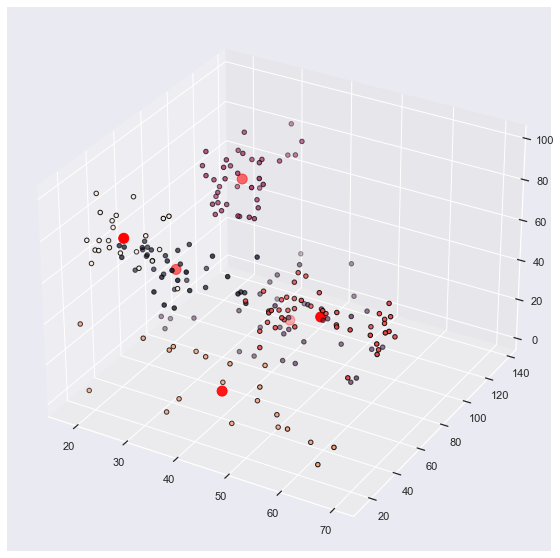

In [21]:
plot_clusters3d(kmeans, X)

### Utilizza l'ultimo modello per associare [questi](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers_predict.csv)  ad un cluster

In [22]:
df_pred = pd.read_csv(URL+"mall_customers_predict.csv")
df_pred.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,40,71,95
1,2,Male,36,87,10
2,3,Female,50,58,46
3,4,Male,47,71,9
4,5,Female,29,98,88


In [23]:
X = df_pred[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values
X.shape

(5, 3)

In [24]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 1, 3, 1, 2])

In [25]:
df_result = pd.DataFrame({
    "CustomerID":df_pred["CustomerID"],
    "Customer Group":y_kmeans,
})

df_result.head()

,CustomerID,Customer Group
0,1,2
1,2,1
2,3,3
3,4,1
4,5,2


In [26]:
df_result.to_excel("mall_customers_prediction.xlsx", index=False)